# Tensor

In [ ]:
# Initializing a Tensor

import torch
import numpy as np

data = [[1, 2],[3, 4]]

# 1. Directly from data
x_data = torch.tensor(data)

# 2. From a NumPy array
np_array = np.array(data)
x_np = torch.from_numpy(np_array)

# 3. From another tensor:
x_ones = torch.ones_like(x_data)
  ## Returns a tensor filled with the scalar value 1, with the same size as input.
print(f"Ones Tensor: \n {x_ones} \n")

x_rand = torch.rand_like(x_data, dtype=torch.float)
  ## Returns a tensor with the same size as input that is filled with random numbers from a uniform distribution on the interval [0,1)
print(f"Random Tensor: \n {x_rand} \n")

# 4. With random or constant values:
shape = (2,3,)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(f"Random Tensor: \n {rand_tensor} \n")
print(f"Ones Tensor: \n {ones_tensor} \n")
print(f"Zeros Tensor: \n {zeros_tensor}")

Ones Tensor: 
 tensor([[1, 1],
        [1, 1]]) 

Random Tensor: 
 tensor([[0.4699, 0.0392],
        [0.6462, 0.3707]]) 

Random Tensor: 
 tensor([[0.0216, 0.8130, 0.0563],
        [0.9470, 0.8825, 0.1417]]) 

Ones Tensor: 
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

Zeros Tensor: 
 tensor([[0., 0., 0.],
        [0., 0., 0.]])


In [ ]:
# Attributes of a Tensor

tensor = torch.rand(3,4)

print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


In [ ]:
# Operations on Tensors

if torch.cuda.is_available():
    tensor = tensor.to("cuda")

# 1. Standard numpy-like indexing and slicing:
tensor = torch.ones(4, 4)
print(f"First row: {tensor[0]}")
print(f"First column: {tensor[:, 0]}")
print(f"Last column: {tensor[:, -1]}")
tensor[:,1] = 0
print(tensor)
print("===============================")

# 2. Joining tensors
t1 = torch.cat([tensor, tensor, tensor], dim=1)
print(t1)
t2 = torch.stack([tensor, tensor, tensor], dim=1)
print(t2)
print("===============================")

# 3. Arithmetic operations
print(tensor.T)
y1 = tensor @ tensor.T
y2 = tensor.matmul(tensor.T)
y3 = torch.matmul(tensor, tensor.T)
print(y3)

z1 = tensor * tensor
z2 = tensor.mul(tensor)
z3 = torch.mul(tensor, tensor)
print(z3)
print("===============================")

# 4. Single-element tensors
agg = tensor.sum()
print(agg) ##tensor
agg_item = agg.item() ##float(Python numerical value)
print(agg_item, type(agg_item))
print("===============================")

# 5. In-place operations
print(f"{tensor} \n")
tensor.add_(5)
print(tensor)

First row: tensor([1., 1., 1., 1.])
First column: tensor([1., 1., 1., 1.])
Last column: tensor([1., 1., 1., 1.])
tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])
tensor([[1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.]])
tensor([[[1., 0., 1., 1.],
         [1., 0., 1., 1.],
         [1., 0., 1., 1.]],

        [[1., 0., 1., 1.],
         [1., 0., 1., 1.],
         [1., 0., 1., 1.]],

        [[1., 0., 1., 1.],
         [1., 0., 1., 1.],
         [1., 0., 1., 1.]],

        [[1., 0., 1., 1.],
         [1., 0., 1., 1.],
         [1., 0., 1., 1.]]])
tensor([[1., 1., 1., 1.],
        [0., 0., 0., 0.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])
tensor([[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]])
tensor(

In [ ]:
# Bridge with NumPy

# 1. Tensor to NumPy array
t = torch.ones(5)
print(f"t: {t}")
n = t.numpy()
print(f"n: {n}")

t.add_(1)
print(f"t: {t}")
print(f"n: {n}")
print("===============================")

# 2. NumPy array to Tensor
n = np.ones(5)
t = torch.from_numpy(n)

np.add(n, 1, out=n)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([1., 1., 1., 1., 1.])
n: [1. 1. 1. 1. 1.]
t: tensor([2., 2., 2., 2., 2.])
n: [2. 2. 2. 2. 2.]
t: tensor([2., 2., 2., 2., 2.], dtype=torch.float64)
n: [2. 2. 2. 2. 2.]


#Datasets & Dataloaders

In [ ]:
# Loading a Dataset

import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt


training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
      ## ToTensor : PIL image -> Tensor
      ## torchvision.transforms.ToPILImage() : Tensor -> PIL image
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



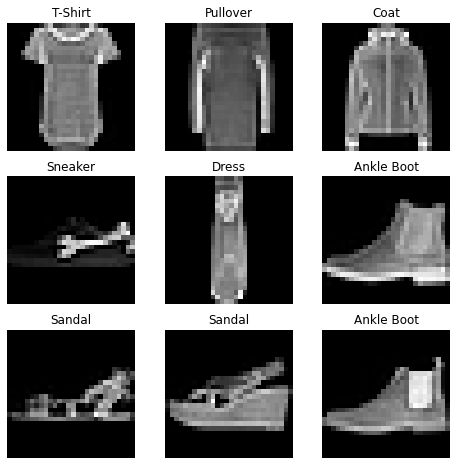

In [ ]:
# Iterating and Visualizing the Dataset

labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
      ## 60000개 중 랜덤으로 하나 숫자 뽑아내는거
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [ ]:
# Creating a Custom Dataset for your files

import os
import pandas as pd
from torchvision.io import read_image

class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file) 
        self.img_dir = img_dir ## directory
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

In [ ]:
# Preparing your data for training with DataLoaders

from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)
  ## minibatch

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


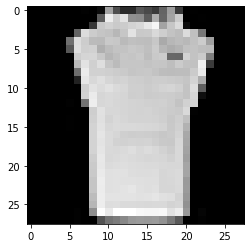

Label: 2


In [ ]:
#Iterate through the DataLoader

train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

# TRANSFORMS

In [ ]:
import torch
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda

ds = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(0, torch.tensor(y), value=1))
)

# BUILD THE NEURAL NETWORK

In [ ]:
import os
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cuda device


In [ ]:
# Define the Class

class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [ ]:
X = torch.rand(1, 28, 28, device=device)
logits = model(X)
pred_probab = nn.Softmax(dim=1)(logits)
y_pred = pred_probab.argmax(1)
print(f"Predicted class: {y_pred}")

Predicted class: tensor([5], device='cuda:0')


In [ ]:
input_image = torch.rand(3,28,28)
print(input_image.size())
print("===============================")

flatten = nn.Flatten()
flat_image = flatten(input_image)
print(flat_image.size())
print("===============================")

layer1 = nn.Linear(in_features=28*28, out_features=20)
hidden1 = layer1(flat_image)
print(hidden1.size())
print("===============================")

print(f"Before ReLU: {hidden1}\n\n")
hidden1 = nn.ReLU()(hidden1)
print(f"After ReLU: {hidden1}")
print("===============================")

seq_modules = nn.Sequential(
    flatten,
    layer1,
    nn.ReLU(),
    nn.Linear(20, 10)
)
input_image = torch.rand(3,28,28)
logits = seq_modules(input_image)

softmax = nn.Softmax(dim=1)
pred_probab = softmax(logits)
pred_probab

torch.Size([3, 28, 28])
torch.Size([3, 784])
torch.Size([3, 20])
Before ReLU: tensor([[ 0.4372, -0.3729, -0.0410, -0.1858,  1.0346,  0.2643,  0.1827, -0.1049,
          0.3758, -0.2350,  0.0868,  0.1076,  0.2384, -0.0427, -0.3992,  0.4416,
         -0.1694, -0.0031, -0.4451, -0.3190],
        [ 0.3139, -0.3286,  0.5258,  0.0756,  0.9462,  0.5376,  0.2560,  0.0902,
         -0.1779, -0.2883,  0.3873, -0.0867, -0.1216, -0.1846, -0.6479,  0.3598,
         -0.1205,  0.1147, -0.1213, -0.3504],
        [ 0.2803, -0.4785,  0.1257,  0.1689,  0.8792,  0.5026,  0.2557, -0.1973,
          0.0162, -0.3753,  0.1902, -0.1956,  0.0605,  0.1538, -0.2224,  0.6300,
         -0.2206, -0.4100, -0.3635, -0.3396]], grad_fn=<AddmmBackward0>)


After ReLU: tensor([[0.4372, 0.0000, 0.0000, 0.0000, 1.0346, 0.2643, 0.1827, 0.0000, 0.3758,
         0.0000, 0.0868, 0.1076, 0.2384, 0.0000, 0.0000, 0.4416, 0.0000, 0.0000,
         0.0000, 0.0000],
        [0.3139, 0.0000, 0.5258, 0.0756, 0.9462, 0.5376, 0.2560, 0.09

tensor([[0.1184, 0.1222, 0.0757, 0.1044, 0.0757, 0.0719, 0.1295, 0.1069, 0.1121,
         0.0832],
        [0.1086, 0.1030, 0.0791, 0.1010, 0.0691, 0.0863, 0.1442, 0.1097, 0.1168,
         0.0822],
        [0.1141, 0.1077, 0.0894, 0.0996, 0.0688, 0.0834, 0.1341, 0.1041, 0.1087,
         0.0902]], grad_fn=<SoftmaxBackward0>)

# AUTOMATIC DIFFERENTIATION WITH TORCH.AUTOGRAD

In [ ]:
import torch

x = torch.ones(5)  # input tensor
y = torch.zeros(3)  # expected output
w = torch.randn(5, 3, requires_grad=True)
b = torch.randn(3, requires_grad=True)
z = torch.matmul(x, w)+b
loss = torch.nn.functional.binary_cross_entropy_with_logits(z, y)

In [ ]:
# Computing Gradients

loss.backward()
print(w.grad)
print(b.grad)


tensor([[0.2321, 0.2264, 0.3063],
        [0.2321, 0.2264, 0.3063],
        [0.2321, 0.2264, 0.3063],
        [0.2321, 0.2264, 0.3063],
        [0.2321, 0.2264, 0.3063]])
tensor([0.2321, 0.2264, 0.3063])


In [ ]:
# Disabling Gradient Tracking

z = torch.matmul(x, w)+b
print(z.requires_grad)

with torch.no_grad(): # 이걸 통해 backpropagation을 멈출 수 있음.
    z = torch.matmul(x, w)+b
print(z.requires_grad)

z = torch.matmul(x, w)+b
z_det = z.detach() # torch.no_grad()와 같은 역할
print(z_det.requires_grad)

True
False
False


In [ ]:
# Optional Reading: Tensor Gradients and Jacobian Products

inp = torch.eye(4, 5, requires_grad=True)
out = (inp+1).pow(2).t()
print(inp)
print(out)
print(torch.ones_like(out))
out.backward(torch.ones_like(out), retain_graph=True)
print(f"First call\n{inp.grad}")
out.backward(torch.ones_like(out), retain_graph=True)
print(f"\nSecond call\n{inp.grad}")
inp.grad.zero_()
out.backward(torch.ones_like(out), retain_graph=True)
print(f"\nCall after zeroing gradients\n{inp.grad}")

tensor([[1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 0., 1., 0.]], requires_grad=True)
tensor([[4., 1., 1., 1.],
        [1., 4., 1., 1.],
        [1., 1., 4., 1.],
        [1., 1., 1., 4.],
        [1., 1., 1., 1.]], grad_fn=<TBackward0>)
tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])
First call
tensor([[4., 2., 2., 2., 2.],
        [2., 4., 2., 2., 2.],
        [2., 2., 4., 2., 2.],
        [2., 2., 2., 4., 2.]])

Second call
tensor([[8., 4., 4., 4., 4.],
        [4., 8., 4., 4., 4.],
        [4., 4., 8., 4., 4.],
        [4., 4., 4., 8., 4.]])

Call after zeroing gradients
tensor([[4., 2., 2., 2., 2.],
        [2., 4., 2., 2., 2.],
        [2., 2., 4., 2., 2.],
        [2., 2., 2., 4., 2.]])


# OPTIMIZING MODEL PARAMETERS


In [ ]:
# Prerequisite Code

import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

train_dataloader = DataLoader(training_data, batch_size=64)
test_dataloader = DataLoader(test_data, batch_size=64)

class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork()

In [ ]:
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        # 예측(prediction)과 손실(loss) 계산
        pred = model(X)
        loss = loss_fn(pred, y)

        # 역전파
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")


def test_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")